In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=0)

## helpers

In [2]:
def random_walk(positions, mean=0, std=1, num_iter=20000):
    '''
    positions:
        an initail ndarray of shape # population & # dimentions
    mean & std:
        mean and std are parameters of the guassion distribution 
        from which random displacement vectors for each agent is chosen
    num_iter:
        how many times to step the agents
    
    random_walk:
        random_walk choses a random dis vec for each agent and steps agent for the specified number of iter.
        It stores the average location of all the agents after each iter and returns this average after simulation.
    '''
    population, dimention = positions.shape
    memo = []
    for _ in xrange(num_iter):
        # add to memory
        memo.append(np.mean(positions, 0))
        # chose a random dir to step forward
        step = np.random.normal(
            loc=mean, scale=std,
            size=(population, dimention)
        ).reshape(population, dimention)
        # update
        positions += step
    # the last update
    memo.append(np.mean(positions, 0))
    return np.array(memo)

In [3]:
def mean_squared_dis(pos):
    '''
    pos:
        ndarray of shape # number iter, # dim
    mean_squared_dis:
        returns the mean squared displacement for each iter
        # https://en.wikipedia.org/wiki/Mean_squared_displacement
    '''
    num_iter, num_dim = pos.shape
    msd = np.zeros_like(pos)
    for i in xrange(1, num_iter):
        sum_sqr_dis = msd[i-1,:] * (i - 1)
        dis_sqr = np.power(pos[i,:], 2)
        msd[i,:] = (sum_sqr_dis + dis_sqr) / i
    return msd

In [4]:
def plot_random_walk(memo, i):
    plt.subplot(len(iterations), 2, 2*i + 1)
    plt.title('random walk')
    plt.plot(memo)
    plt.legend(['x','y','z'])
    plt.subplot(len(iterations), 2, 2*i + 2)
    plt.title('mean squared displacement')
    plt.plot(mean_squared_dis(memo))
    plt.legend(['x','y','z'])

In [5]:
def iterator(iterations, mean, std, population):
    plt.figure(figsize=(16, 16))
    for i, num_iter in enumerate(iterations):
        bacteria_pos = np.random.normal(loc=mean, scale=std, size=(population, 3)).reshape(population, 3)
        memo = random_walk(bacteria_pos, mean, std, num_iter)
        plot_random_walk(memo, i)

# Random walks
* when population changes
* with fix mean and std

## For a small population

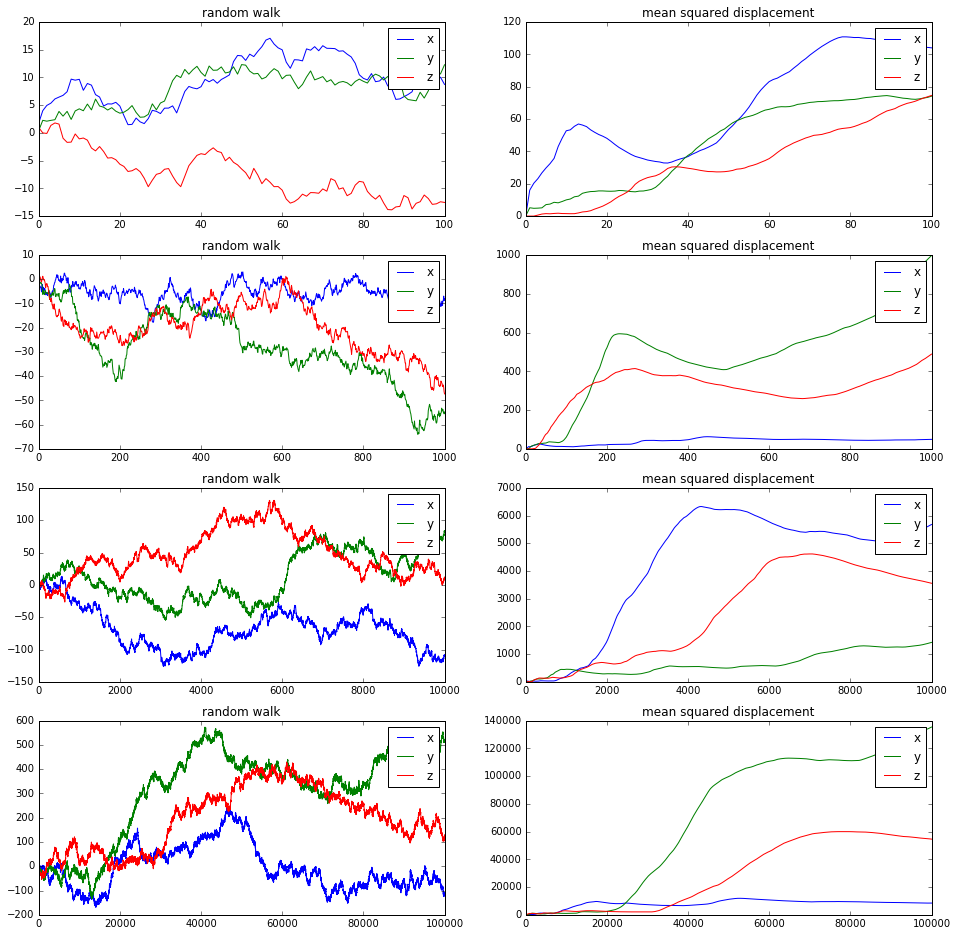

In [6]:
# Parameters
population = 1
mean = 0
std = 1
iterations = [100, 1000, 10000, 100000]

iterator(iterations, mean, std, population)

## For a medium population

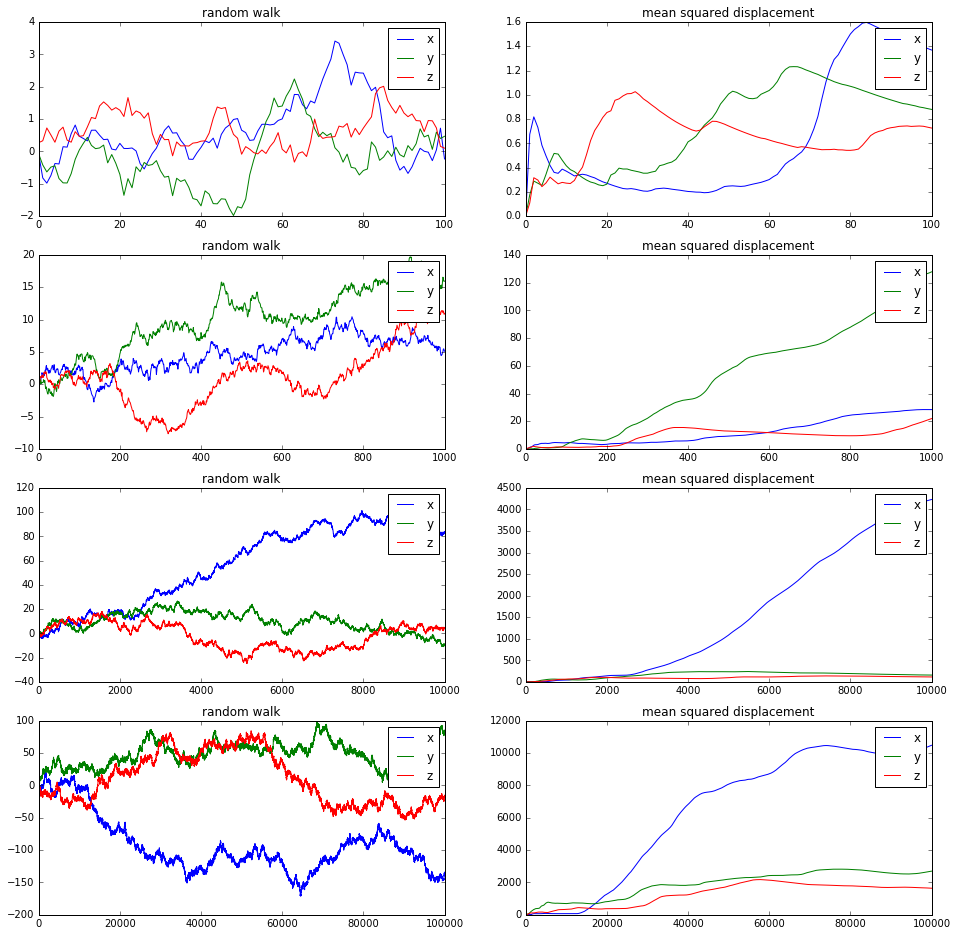

In [7]:
# Parameters
population = 10
mean = 0
std = 1
iterations = [100, 1000, 10000, 100000]

iterator(iterations, mean, std, population)

## For a large population

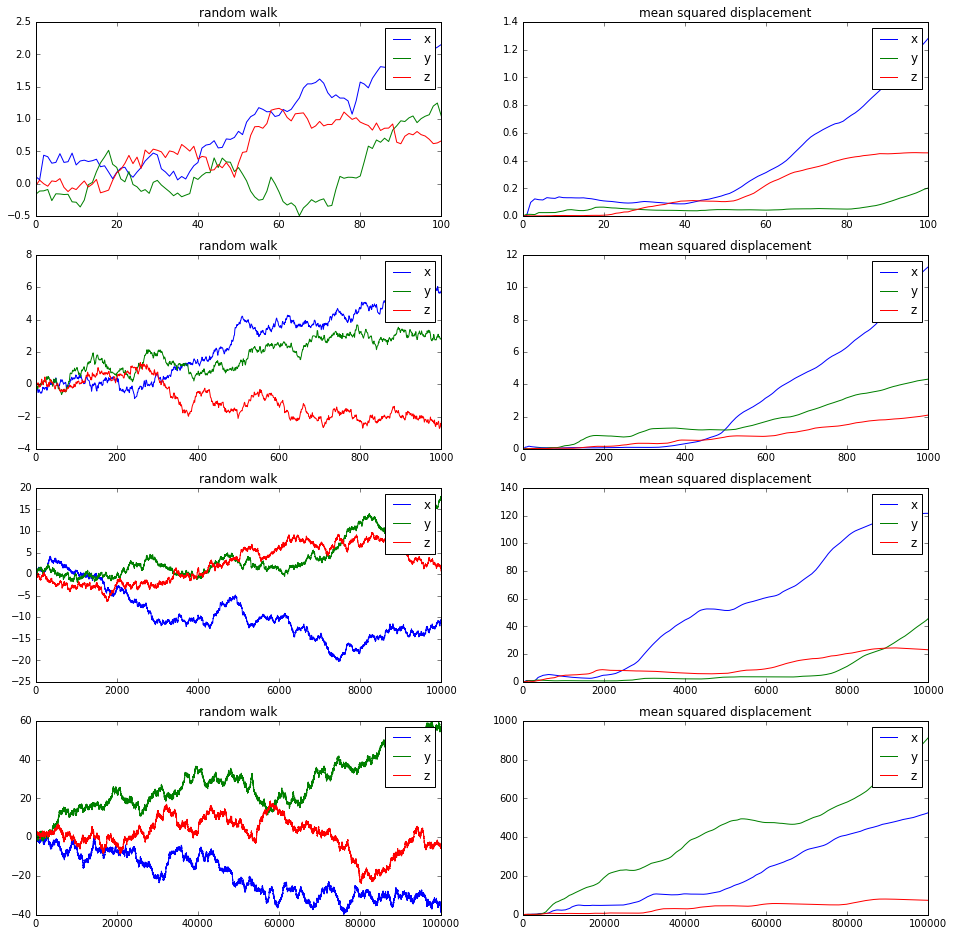

In [8]:
# Parameters
population = 100
mean = 0
std = 1
iterations = [100, 1000, 10000, 100000]

iterator(iterations, mean, std, population)

### observation
1. Larger # iter, increases the variation in the average position of the agents
2. Larger # agents, reduces the variation in the average position of the agents

## Random walks
* when agents move toward a dir
* with fixed population and std

### for small mean

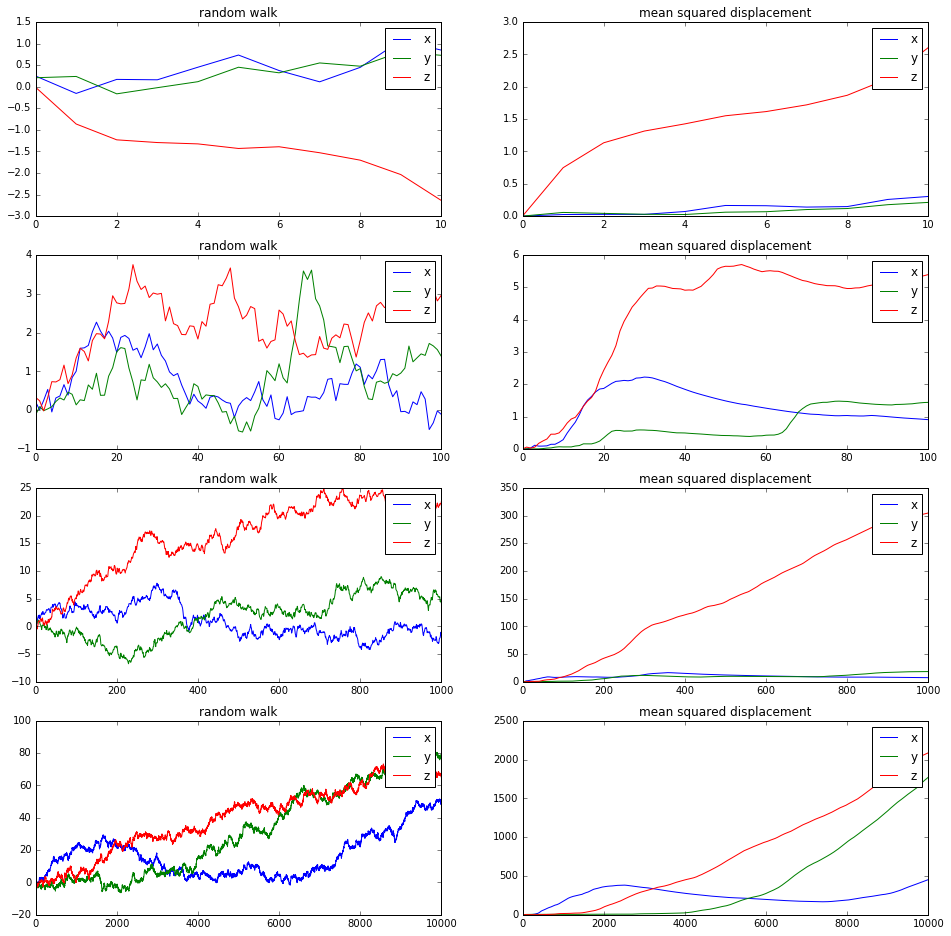

In [9]:
# Parameters
population = 10
mean = 0.01
std = 1
iterations = [10, 100, 1000, 10000]

iterator(iterations, mean, std, population)

### for medium mean

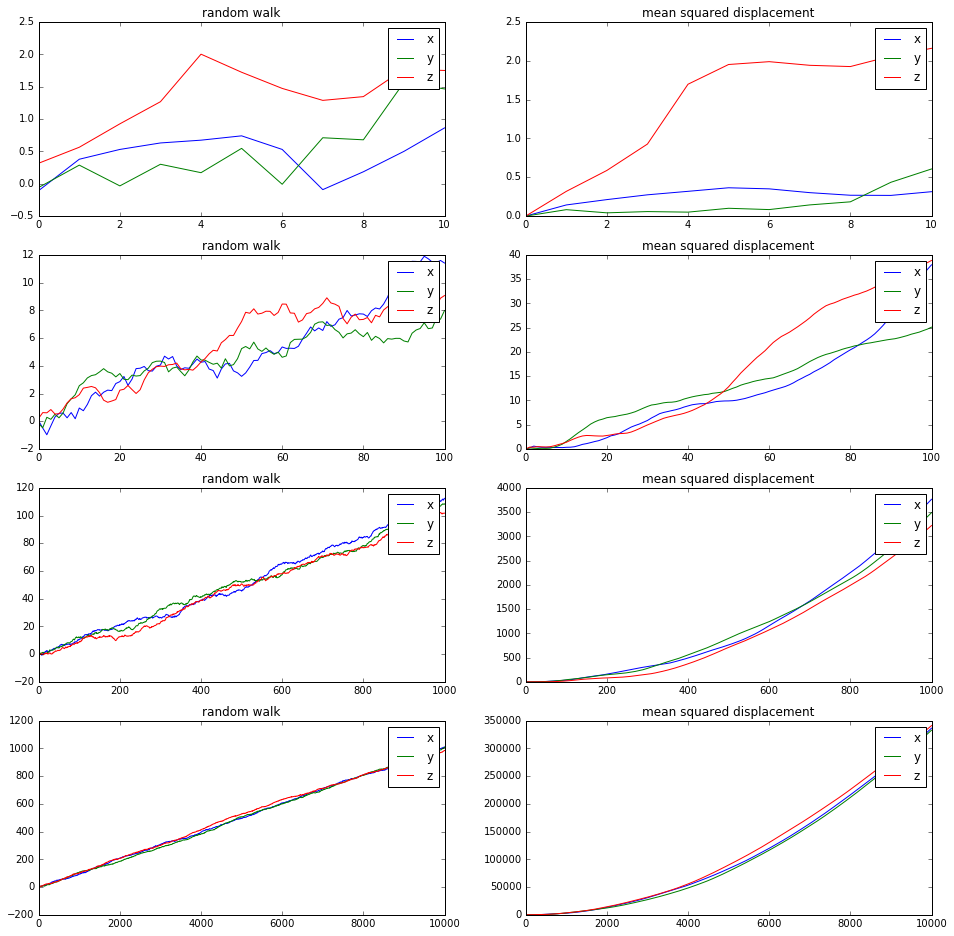

In [10]:
# Parameters
population = 10
mean = 0.1
std = 1
iterations = [10, 100, 1000, 10000]

iterator(iterations, mean, std, population)

### for a large mean

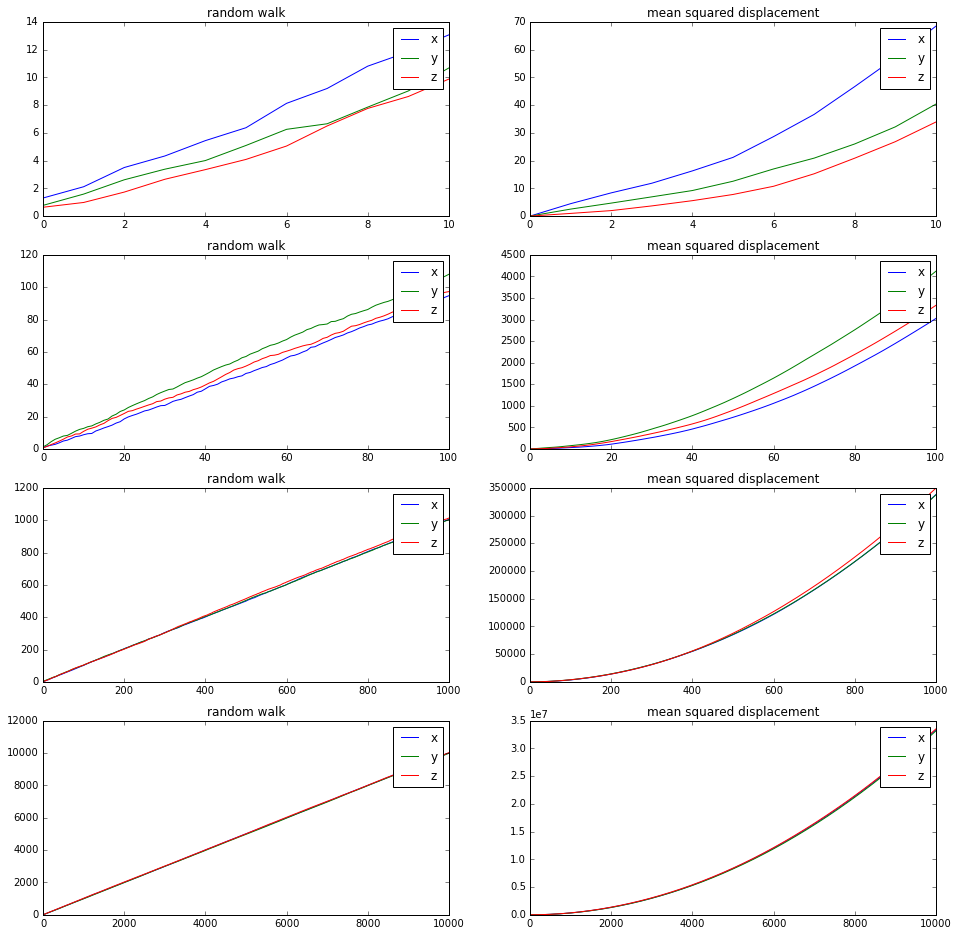

In [11]:
# Parameters
population = 10
mean = 1
std = 1
iterations = [10, 100, 1000, 10000]

iterator(iterations, mean, std, population)

### observation
1. the larger # iter, the more clear the trend toward the dir becomes
2. the larger mean/std, the more immediate this trend becomes visible

## Random walks
* when the dis where the random dir is chosen changes
* with fixed population and mean

### small std

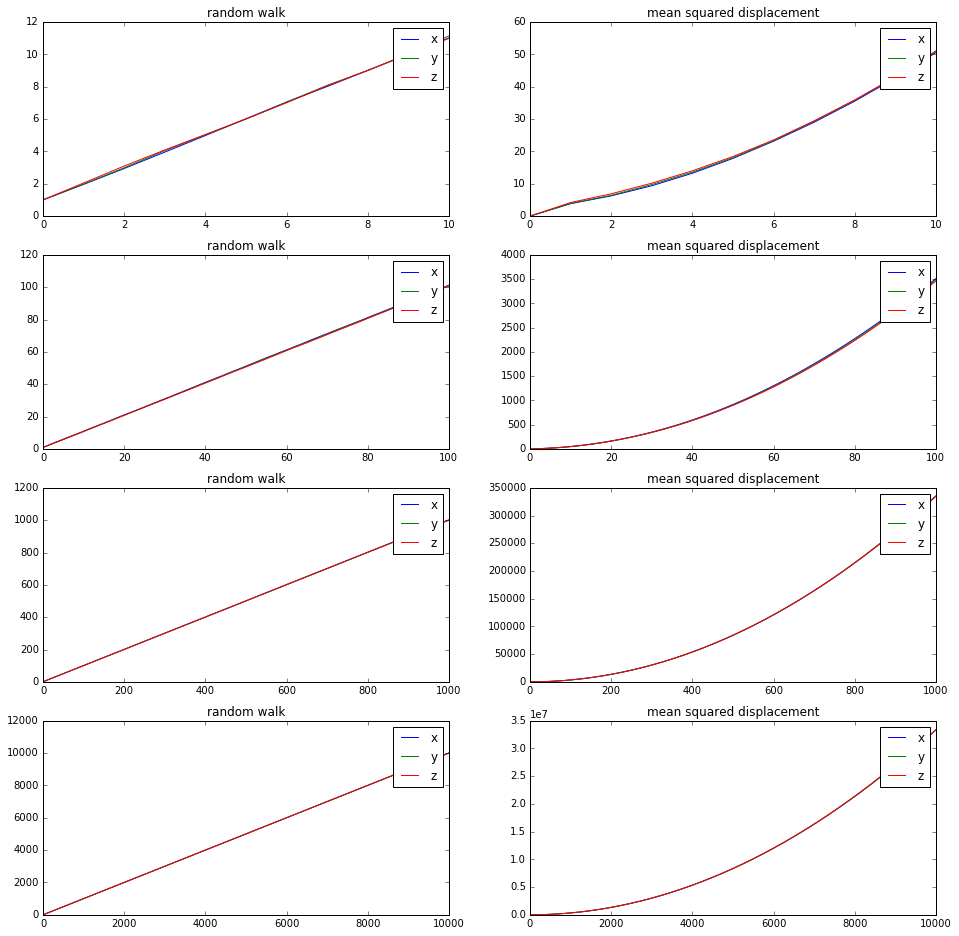

In [12]:
# Parameters
population = 10
mean = 1
std = 0.1
iterations = [10, 100, 1000, 10000]

iterator(iterations, mean, std, population)

## medium std

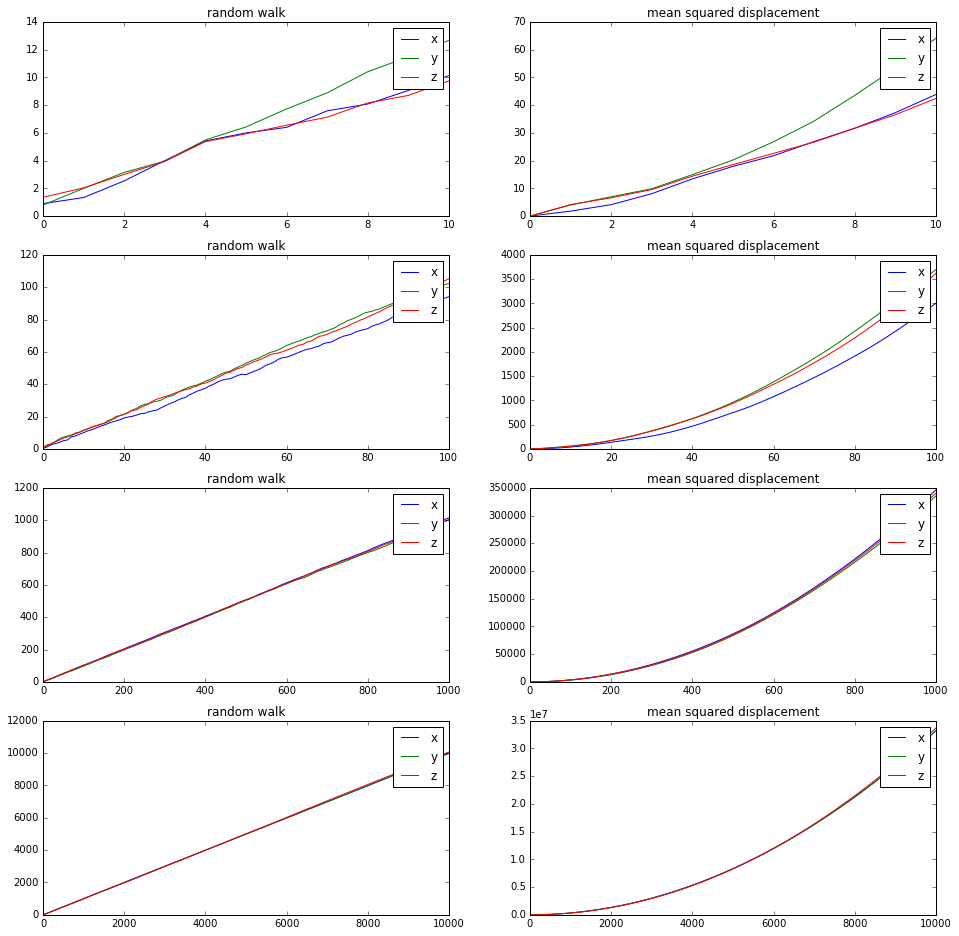

In [13]:
# Parameters
population = 10
mean = 1
std = 1
iterations = [10, 100, 1000, 10000]

iterator(iterations, mean, std, population)

### large std

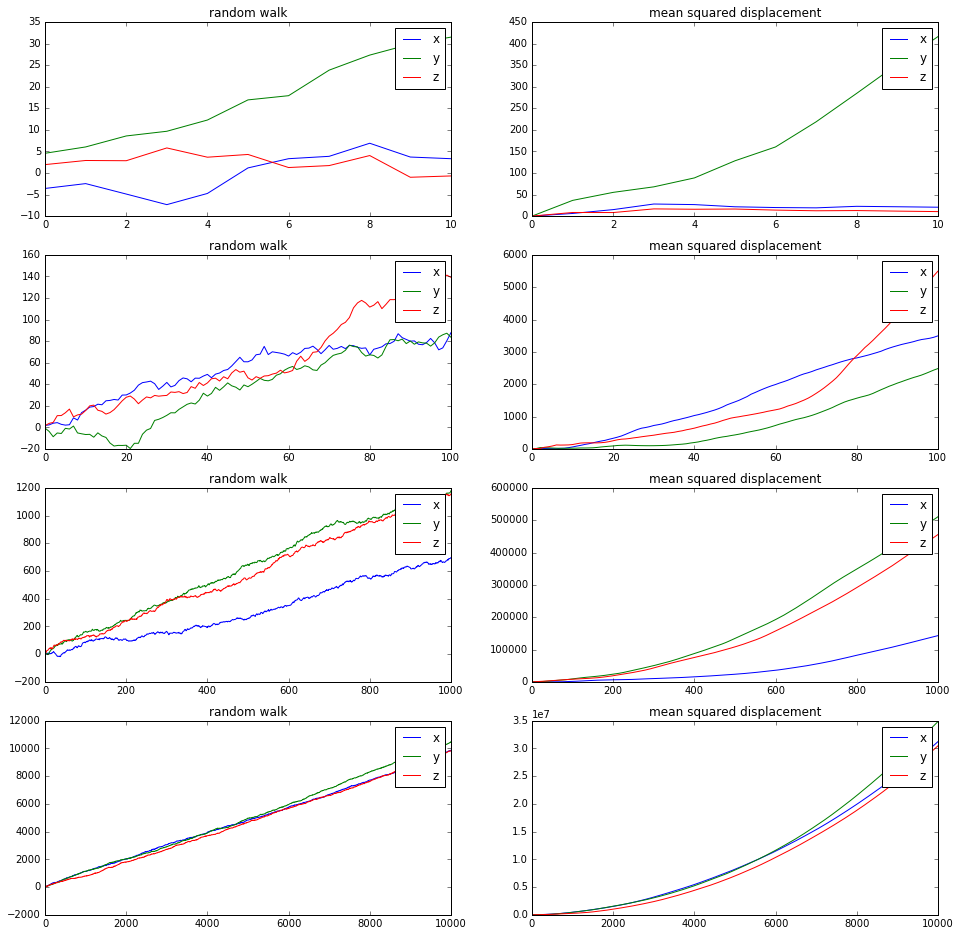

In [14]:
# Parameters
population = 10
mean = 1
std = 10
iterations = [10, 100, 1000, 10000]

iterator(iterations, mean, std, population)

### observation
1. the larger the std/mean, the more variation in the position of the avg agents